#### Gorsse 2018 database
Gorsse_Data in Brief 21 (2018) 2664–2678_Database on the mechanical properties of high entropy alloys and complex concentrated alloys_10.1016/j.dib.2018.11.111  
google sheets: https://docs.google.com/spreadsheets/d/1jFeJPJOKPW2i-xa2iE_IGlFDvCO2pHkDKnDrp8E45l0/edit?gid=0#gid=0  
Modificação: Adicionar porcentagem atômica

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("Database_Gorsse_2018_adapt.csv")
df.head()

,Unnamed: 0,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,...,W,Ref.,Type of phases,r# (g/cm3),HV,Type of tests,sy (MPa),smax (MPa),e (%),E# (GPa)
0,0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,4,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,4,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,5,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,...,NaN,4,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,...,NaN,4,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN


#### Limpeza
- Dropar primeira coluna e de Ref
- trocar nomes de colunas

In [106]:
# Drop primeira coluna e ref
df.drop(labels = ["Unnamed: 0", "Ref."], axis=1, inplace = True)
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Ta,W,Type of phases,r# (g/cm3),HV,Type of tests,sy (MPa),smax (MPa),e (%),E# (GPa)
0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,NaN,NaN,NaN,17.241379,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,NaN,NaN,NaN,16.666667,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,NaN,NaN,NaN,14.285714,NaN,14.285714,...,NaN,NaN,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,NaN,16.666667,16.666667,NaN,NaN,NaN,NaN,NaN,16.666667,...,NaN,NaN,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0


In [107]:
# renomear algumas colunas
columns = {'Type of phases':'phases',
          'r# (g/cm3)':'ro',
          'Type of tests':'test',
          'sy (MPa)':"YS",
          'smax (MPa)':'UTS',
          'e (%)':'elong',
          'E# (GPa)':'E'}
df.rename(columns = columns,inplace=True)
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Ta,W,phases,ro,HV,test,YS,UTS,elong,E
0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,NaN,NaN,NaN,17.241379,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,NaN,NaN,NaN,16.666667,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,NaN,NaN,NaN,14.285714,NaN,14.285714,...,NaN,NaN,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,NaN,16.666667,16.666667,NaN,NaN,NaN,NaN,NaN,16.666667,...,NaN,NaN,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0


#### EDA
Todos são features e YS é o target

In [111]:
df["SpecStrength"] = df["YS"]/df["ro"]
df
# Não esquecer de dropar YS e ro antes de rodar algum modelo

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,W,phases,ro,HV,test,YS,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,NaN,T,211.0,513.0,31,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,0.000000,0.0,0.0,17.241379,0.0,0.000000,...,0.0,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,0.000000,0.0,0.0,16.666667,0.0,0.000000,...,0.0,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,0.000000,0.0,0.0,14.285714,0.0,14.285714,...,0.0,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,0.000000,16.666667,16.666667,0.000000,0.0,0.0,0.000000,0.0,16.666667,...,0.0,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0,NaN


In [110]:
# Criando o target - Specific strength - verificar a unidade
df.dropna(subset=["SpecStrength"])

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,W,phases,ro,HV,test,YS,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,FCC,8.5,NaN,T,211.0,513.0,31,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.00,0.000000,0.000000,...,0.0,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.00,0.000000,0.000000,...,0.0,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NbTiV0.3Mo1.5Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.25,20.833333,20.833333,...,0.0,BCC,7.5,NaN,C,1576.0,NaN,8,NaN,210.133333
337,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,BCC,6.5,NaN,C,1104.0,NaN,50,NaN,169.846154
338,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,BCC,6.5,335.0,C,1105.0,NaN,> 50,104.0,170.000000
339,NbTiV2Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,20.000000,20.000000,...,0.0,BCC,6.4,304.0,C,918.0,NaN,> 50,109.0,143.437500


In [112]:
elements = df.columns.values.tolist()[1:25]
df[elements] = df[elements].fillna(0)

In [113]:
df["phases"].unique()
# Aplicar One Hot Encoder

array(['FCC', 'FCC + Im', 'FCC + BCC', 'FCC + BCC + B2', 'BCC',
       'BCC + Im', 'B2 + Im', 'FCC + B2 + Im', 'FCC + BCC + Im', nan,
       'BCC + B2', 'Im', 'FCC + HCP', 'FCC + HCP + Im', 'BCC + lm',
       'BCC+HCP'], dtype=object)

In [114]:
df.select_dtypes(exclude="number").columns

Index(['Nome', 'phases', 'test', 'elong'], dtype='object')

In [115]:
# Como trabalhar com esse valor - renomear '< 1' por 0.5
df[df['elong'] == "< 1"][['elong']].index

Int64Index([107, 133, 247, 255, 256, 257, 356], dtype='int64')

In [116]:
df_teste = df.replace('< 1', 0.5)
df_teste.replace("> 50", 50, inplace = True)
df_teste = df_teste.astype({"elong":"float64"})

In [117]:
df_teste

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,W,phases,ro,HV,test,YS,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,NaN,T,211.0,513.0,31.0,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,0.000000,0.0,0.0,17.241379,0.0,0.000000,...,0.0,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,0.000000,0.0,0.0,16.666667,0.0,0.000000,...,0.0,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,0.000000,0.0,0.0,14.285714,0.0,14.285714,...,0.0,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,0.000000,16.666667,16.666667,0.000000,0.0,0.0,0.000000,0.0,16.666667,...,0.0,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0,NaN


In [118]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          357 non-null    object 
 1   Co            357 non-null    float64
 2   Fe            357 non-null    float64
 3   Ni            357 non-null    float64
 4   Si            357 non-null    float64
 5   Al            357 non-null    float64
 6   Cr            357 non-null    float64
 7   Mo            357 non-null    float64
 8   Nb            357 non-null    float64
 9   Ti            357 non-null    float64
 10  C             357 non-null    float64
 11  V             357 non-null    float64
 12  Zr            357 non-null    float64
 13  Mn            357 non-null    float64
 14  Cu            357 non-null    float64
 15  B             357 non-null    float64
 16  Y             357 non-null    float64
 17  Sn            357 non-null    float64
 18  Li            357 non-null    

In [119]:
# Separar em categóricos e numéricos
cat = df_teste.select_dtypes(exclude = 'number').columns # ou "object"
num = df_teste.columns.drop(cat)
print(num)
print(cat)

Index(['Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C', 'V', 'Zr',
       'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf', 'Ta', 'W',
       'ro', 'HV', 'YS', 'UTS', 'elong', 'E', 'SpecStrength'],
      dtype='object')
Index(['Nome', 'phases', 'test'], dtype='object')


In [120]:
# Como tratar essas features? 
df[num].drop(columns = elements).describe()

,ro,HV,YS,UTS,E,SpecStrength
count,357.000000,237.000000,180.000000,120.000000,237.000000,180.000000
mean,7.271709,458.472574,1201.577778,1768.891667,163.565401,167.781826
std,1.252328,180.689464,578.750580,951.640280,44.598407,86.896663
min,2.700000,110.000000,148.000000,261.000000,36.000000,18.048780
25%,6.700000,319.000000,897.000000,885.750000,140.000000,115.127976
50%,7.200000,487.000000,1260.000000,1675.000000,178.000000,169.848450
75%,7.800000,587.000000,1583.000000,2391.750000,194.000000,216.986764
max,13.700000,905.000000,2757.000000,3929.000000,258.000000,422.982456


<AxesSubplot:ylabel='Density'>

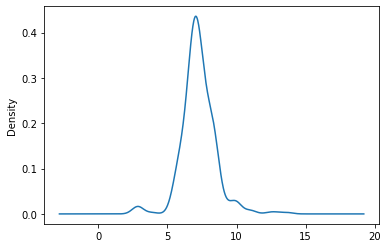

In [121]:
# Colocar todos num mesmo plot
df['ro'].plot(kind="kde")
# ro tem uma distribuição parecida com curva normal

<AxesSubplot:ylabel='Density'>

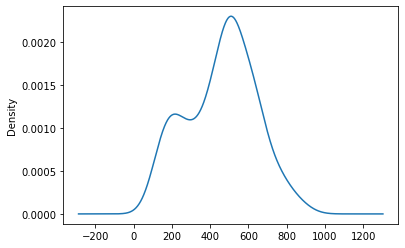

In [89]:
df['HV'].plot(kind="kde")
# Mesmo com essa aparência, vamos tratar como curva normal

<AxesSubplot:ylabel='Density'>

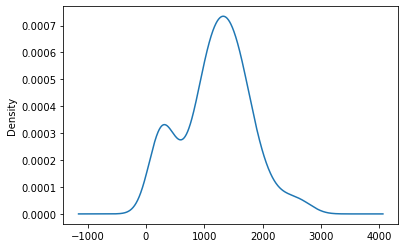

In [122]:
df['YS'].plot(kind="kde")
# Curva similar com a densidade - 

<AxesSubplot:ylabel='Density'>

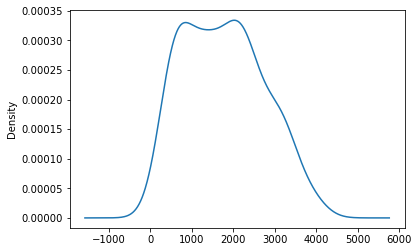

In [123]:
df['UTS'].plot(kind="kde")
# Mais próximo da normal

<AxesSubplot:ylabel='Density'>

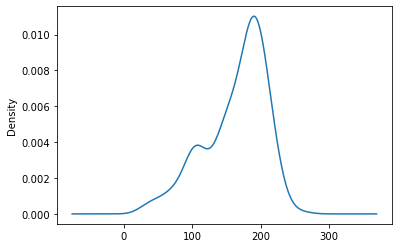

In [124]:
df['E'].plot(kind="kde")
# Skewed

<AxesSubplot:ylabel='Density'>

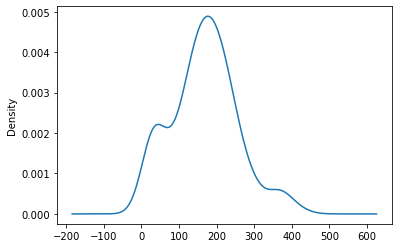

In [125]:
df['SpecStrength'].plot(kind="kde")

In [126]:
df.drop(columns = ['ro','YS'], inplace = True)

In [247]:
# Como vamos tratar test?
df_final = df.dropna(subset = ['test'])
df_final

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Hf,Ta,W,phases,HV,test,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,FCC,125.0,C,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,FCC,125.0,C,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,FCC,NaN,T,513.0,31,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,FCC,149.0,C,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,FCC + Im,287.0,C,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NbTiV0.3Mo1.5Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.25,20.833333,20.833333,...,0.0,0.0,0.0,BCC,NaN,C,NaN,8,NaN,210.133333
337,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,BCC,NaN,C,NaN,50,NaN,169.846154
338,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,BCC,335.0,C,NaN,> 50,104.0,170.000000
339,NbTiV2Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,20.000000,20.000000,...,0.0,0.0,0.0,BCC,304.0,C,NaN,> 50,109.0,143.437500


In [248]:
# Como a liga que queremos não tiveram ensaios realizados, não teremos os valores de UTS, elong e E.
df_final = df_final.drop(columns = ['UTS', 'elong','E'])
df_final

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Mg,Zn,Sc,Hf,Ta,W,phases,HV,test,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,125.0,C,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,125.0,C,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,NaN,T,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,149.0,C,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC + Im,287.0,C,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NbTiV0.3Mo1.5Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.25,20.833333,20.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,NaN,C,210.133333
337,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,NaN,C,169.846154
338,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,335.0,C,170.000000
339,NbTiV2Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,20.000000,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,304.0,C,143.437500


In [249]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 356
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          203 non-null    object 
 1   Co            203 non-null    float64
 2   Fe            203 non-null    float64
 3   Ni            203 non-null    float64
 4   Si            203 non-null    float64
 5   Al            203 non-null    float64
 6   Cr            203 non-null    float64
 7   Mo            203 non-null    float64
 8   Nb            203 non-null    float64
 9   Ti            203 non-null    float64
 10  C             203 non-null    float64
 11  V             203 non-null    float64
 12  Zr            203 non-null    float64
 13  Mn            203 non-null    float64
 14  Cu            203 non-null    float64
 15  B             203 non-null    float64
 16  Y             203 non-null    float64
 17  Sn            203 non-null    float64
 18  Li            203 non-null    

In [250]:
# No caso de HV, podemos aplicar um imputer para não perdermos muitos dados
df_final[['HV']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 356
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HV      95 non-null     float64
dtypes: float64(1)
memory usage: 3.2 KB


In [255]:
# Imputer de mediana para HV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
df_final[["HV"]] = imputer.fit_transform(df_final[["HV"]])

In [256]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 356
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          203 non-null    object 
 1   Co            203 non-null    float64
 2   Fe            203 non-null    float64
 3   Ni            203 non-null    float64
 4   Si            203 non-null    float64
 5   Al            203 non-null    float64
 6   Cr            203 non-null    float64
 7   Mo            203 non-null    float64
 8   Nb            203 non-null    float64
 9   Ti            203 non-null    float64
 10  C             203 non-null    float64
 11  V             203 non-null    float64
 12  Zr            203 non-null    float64
 13  Mn            203 non-null    float64
 14  Cu            203 non-null    float64
 15  B             203 non-null    float64
 16  Y             203 non-null    float64
 17  Sn            203 non-null    float64
 18  Li            203 non-null    

In [261]:
df_final.dropna(subset = ["SpecStrength", "Nome"], inplace = True)

In [262]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 356
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          180 non-null    object 
 1   Co            180 non-null    float64
 2   Fe            180 non-null    float64
 3   Ni            180 non-null    float64
 4   Si            180 non-null    float64
 5   Al            180 non-null    float64
 6   Cr            180 non-null    float64
 7   Mo            180 non-null    float64
 8   Nb            180 non-null    float64
 9   Ti            180 non-null    float64
 10  C             180 non-null    float64
 11  V             180 non-null    float64
 12  Zr            180 non-null    float64
 13  Mn            180 non-null    float64
 14  Cu            180 non-null    float64
 15  B             180 non-null    float64
 16  Y             180 non-null    float64
 17  Sn            180 non-null    float64
 18  Li            180 non-null    

In [161]:
# Separação de inputs e target
X = df_final.drop(["SpecStrength", "Nome"], axis = 1)
y = df_final[['SpecStrength']]

In [263]:
X[['HV']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 356
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HV      180 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


<AxesSubplot:ylabel='Density'>

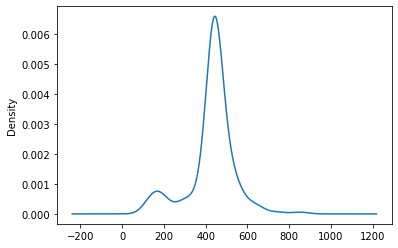

In [264]:
# Alterou o formato
X['HV'].plot(kind="kde")

# One Hot Encoder
Transforma cada uma das categorias em dados binários em colunas distintas  
Aplicar o OHE após separação de dados

In [265]:
X_cat = X[['phases','test']]

In [289]:
ind = one_hot_df.index
df_final.set_index(ind,inplace=True)

In [291]:
# Aplicar o One Hot Encoder antes do split
from sklearn.preprocessing import OneHotEncoder

# Instanciar e treinar
encoder = OneHotEncoder(drop='first', sparse = False)
one_hot_encoded = encoder.fit_transform(X_cat)

# transformar em DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['phases','test']))

# Concatenar e dropar inputs categóricos
df_encoded = pd.concat([df_final, one_hot_df], axis = 1)
df_encoded = df_encoded.drop(['phases','test'], axis = 1)

In [293]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nome                   180 non-null    object 
 1   Co                     180 non-null    float64
 2   Fe                     180 non-null    float64
 3   Ni                     180 non-null    float64
 4   Si                     180 non-null    float64
 5   Al                     180 non-null    float64
 6   Cr                     180 non-null    float64
 7   Mo                     180 non-null    float64
 8   Nb                     180 non-null    float64
 9   Ti                     180 non-null    float64
 10  C                      180 non-null    float64
 11  V                      180 non-null    float64
 12  Zr                     180 non-null    float64
 13  Mn                     180 non-null    float64
 14  Cu                     180 non-null    float64
 15  B     

In [300]:
# Salvando o DataFrame limpo
df_encoded.to_csv("df_encoded.csv")

In [306]:
# Configurar os inputs dos targets
y = df_encoded["SpecStrength"]
X = df_encoded.drop(columns = ["Nome","SpecStrength"])

In [307]:
X.columns

Index(['Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C', 'V', 'Zr',
       'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf', 'Ta', 'W',
       'HV', 'phases_BCC', 'phases_BCC + B2', 'phases_BCC + Im',
       'phases_BCC + lm', 'phases_BCC+HCP', 'phases_FCC', 'phases_FCC + BCC',
       'phases_FCC + BCC + B2', 'phases_FCC + BCC + Im',
       'phases_FCC + HCP + Im', 'phases_FCC + Im', 'test_T'],
      dtype='object')

In [308]:
#### separar os dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [309]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 19 to 177
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Co                     144 non-null    float64
 1   Fe                     144 non-null    float64
 2   Ni                     144 non-null    float64
 3   Si                     144 non-null    float64
 4   Al                     144 non-null    float64
 5   Cr                     144 non-null    float64
 6   Mo                     144 non-null    float64
 7   Nb                     144 non-null    float64
 8   Ti                     144 non-null    float64
 9   C                      144 non-null    float64
 10  V                      144 non-null    float64
 11  Zr                     144 non-null    float64
 12  Mn                     144 non-null    float64
 13  Cu                     144 non-null    float64
 14  B                      144 non-null    float64
 15  Y    

In [112]:
# Pequeno exemplo
# Dados de entrada
X = np.array([['abacate'], 
              ['Irmão do Jorel'], 
              ['Vovó Juju'], 
              ['Vovó Juju'], 
              ['Irmão do Jorel']])

#Instancia o encoder
dummy_enc = OneHotEncoder(drop='first', sparse=False)

# treinando e transformando os dados de entrada
X_ohe = dummy_enc.fit_transform(X)

print(X_ohe)

[[0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]]


#### Standard scaler

In [114]:
from sklearn.preprocessing import StandardScaler
# Vamos criar dados numéricos como exemplo.
X = np.array([[-1.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
standard_scaler = StandardScaler()

# Treinando o encoder e transformando os dados de entrada.
X_std = standard_scaler.fit_transform(X)

# Mostrando o resultado.
print(X_std)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [117]:
from sklearn.preprocessing import MinMaxScaler

# Vamos criar dados numéricos como exemplo. 
X = np.array([[-1.0], 
              [-0.5], 
              [0.], 
              [0.5], 
              [1.0]])

# Instanciando o encoder.
minmax_scaler = MinMaxScaler() # feature_range = [-3,4], caso queira que esteja entre alguns valores

# Treinando o encoder e transformando os dados de entrada.
X_minmax = minmax_scaler.fit_transform(X)

# Mostrando o resultado.
print(X_minmax)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [ ]:
# imputer em HV

#### Aplicar modelo de regressão

In [363]:
from sklearn.linear_model import LinearRegression, Lasso

lasso = Lasso(alpha=10).fit(X_train, y_train)

In [378]:
# predict y_hat with x_test
y_hat = lasso.predict(X_test)
y_hat

array([226.95410633, 192.58193963, 160.95587357, 205.37605253,
       208.489489  , 238.83728269, 143.78405376, 146.35918668,
       177.01336489, 150.68116165, 188.76709585,  12.86279565,
       201.61509585, 200.64518913, 168.69098423, 210.9812045 ,
       137.83759836, 107.38086396, 156.1203288 , 213.9254028 ,
       181.34934405, 115.43837699, 148.854836  , 155.30861977,
        39.27957247, 121.25753303, 238.26251263, 186.67481735,
       241.16701808, 260.49106951, 138.83095032, 212.18179341,
       190.4773118 , 143.78405376, 233.76053088, 192.13850236])

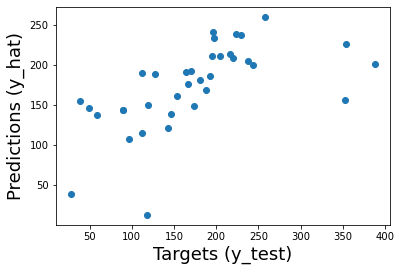

In [379]:
# Check with a plot
plt.scatter(y_test, y_hat)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat)", size = 18)
plt.show()

C:\Users\gabri\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

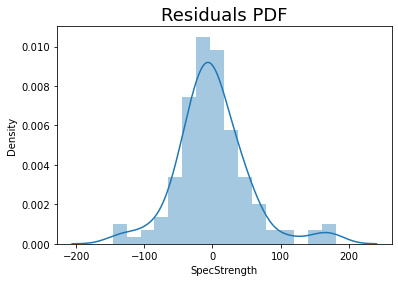

In [374]:
# Find the residuals (Differences between the targets and the predictors)
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [380]:
reg.score(X_test, y_test) # Our model explain 78% of the variability of the data

0.3595563460319142